<a href="https://colab.research.google.com/github/HunterAlpha7/Arnage/blob/main/0432220005101066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** *Seyam Bin H Rahman*<br>
**ID:** *0432220005101066*<br>
**Section:** 7A

In [13]:
import numpy as np
import scipy.stats as stats #new library
import matplotlib.pyplot as plt
data1 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
data2 = np.array([8,12,10,15,9,13,11,14,7,16,10,12,9,15,11,13,14,8,12,10])

**Part 1**

In [20]:
# Compute mean, variance, and standard deviation for data1
mean1 = np.mean(data1)
variance1 = np.var(data1) # Population variance
std_dev1 = np.std(data1)

print(f'Data 1:')
print(f'Mean: {mean1:.2f}')
print(f'Variance (Population): {variance1:.2f}')
print(f'Standard Deviation (Population): {std_dev1:.2f}')

# Compute mean, variance, and standard deviation for data2
mean2 = np.mean(data2)
variance2 = np.var(data2) # Population variance
std_dev2 = np.std(data2)

print(f'\nData 2:')
print(f'Mean: {mean2:.2f}')
print(f'Variance (Population): {variance2:.2f}')
print(f'Standard Deviation (Population): {std_dev2:.2f}')

# Sample variance (using ddof=1)
sample_variance1 = np.var(data1, ddof=1)
sample_variance2 = np.var(data2, ddof=1)

print(f'\nSample Variance (Data 1): {sample_variance1:.2f}')
print(f'Sample Variance (Data 2): {sample_variance2:.2f}')

print("\nDifference between population variance and sample variance:")
print("Population variance uses N (the total number of observations) in the denominator.")
print("Sample variance uses N-1 (degrees of freedom) in the denominator.")
print("Using N-1 in the sample variance provides a less biased estimate of the population variance, especially for smaller sample sizes.")

Data 1:
Mean: 10.50
Variance (Population): 33.25
Standard Deviation (Population): 5.77

Data 2:
Mean: 11.45
Variance (Population): 6.35
Standard Deviation (Population): 2.52

Sample Variance (Data 1): 35.00
Sample Variance (Data 2): 6.68

Difference between population variance and sample variance:
Population variance uses N (the total number of observations) in the denominator.
Sample variance uses N-1 (degrees of freedom) in the denominator.
Using N-1 in the sample variance provides a less biased estimate of the population variance, especially for smaller sample sizes.


**Part 2**

In [ ]:
# Assume customer arrivals follow a uniform distribution
# Let's use the range of data2 for the uniform distribution
min_arrivals = np.min(data2)
max_arrivals = np.max(data2)

# Generate simulated data for 30 days
simulated_data = np.random.uniform(min_arrivals, max_arrivals, 30)
simulated_data = np.round(simulated_data).astype(int) # Round to nearest integer for customer count

print("Simulated daily customer arrivals (30 days):")
print(simulated_data)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for real data (data2)
axes[0].hist(data2, bins=np.arange(min(data2), max(data2) + 2) - 0.5, rwidth=0.8, color='skyblue', alpha=0.7)
axes[0].set_title('Real Data Histogram')
axes[0].set_xlabel('Number of Arrivals')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for simulated data
axes[1].hist(simulated_data, bins=np.arange(min(simulated_data), max(simulated_data) + 2) - 0.5, rwidth=0.8, color='lightcoral', alpha=0.7)
axes[1].set_title('Simulated Data Histogram')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

**Part 3**

In [23]:
# Using Monte Carlo Simulations to estimate probability

# Define the number of simulations
num_simulations = 100000

# Define min and max arrivals based on data2
min_arrivals = np.min(data2)
max_arrivals = np.max(data2)

# Simulate customer arrivals using the uniform distribution
simulated_arrivals = np.random.uniform(min_arrivals, max_arrivals, num_simulations)

# Round to the nearest integer
simulated_arrivals = np.round(simulated_arrivals).astype(int)

# Count the number of simulations where arrivals are more than 15
arrivals_more_than_15 = np.sum(simulated_arrivals > 15)

# Estimate the probability
probability_more_than_15 = arrivals_more_than_15 / num_simulations

print(f"Estimated probability of more than 15 customer arrivals: {probability_more_than_15:.4f}")

Estimated probability of more than 15 customer arrivals: 0.0546


**Part 4**

In [21]:
# Step 2: Define the population mean (hypothesized mean)
population_mean = 16  # Null Hypothesis (H₀): The average class score is 70

# Step 3: Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data2, population_mean)
#$ci = stats.t.interval(0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

# Step 4: Display the results
print(f'Sample Mean: {np.mean(data2):.2f}')
print(f'Hypothesized Population Mean: {population_mean:.2f}')
print(f't-Statistic: {t_statistic:.2f}')
print(f'Degrees of Freedom: {len(data2) - 1}') # Changed data to data2 to match the t-test data
print(f'p-Value: {p_value:.4f}')
#print(f'Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]')

Sample Mean: 11.45
Hypothesized Population Mean: 16.00
t-Statistic: -7.87
Degrees of Freedom: 19
p-Value: 0.0000


In [16]:
# Step 5: Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. ')
else:
    print(f'Fail to reject the null hypothesis.')

Reject the null hypothesis. 


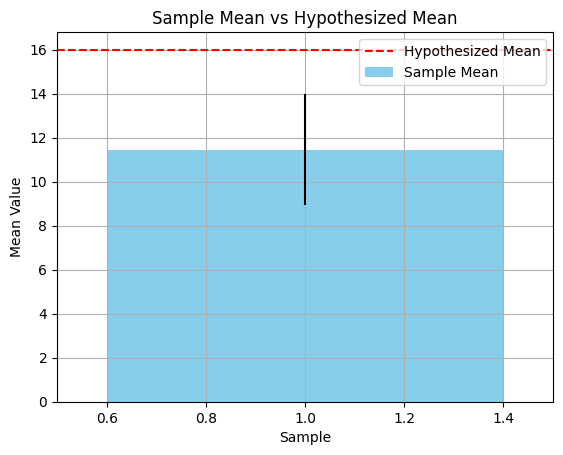

In [18]:
plt.figure()
plt.bar(1, np.mean(data), color="skyblue", label='Sample Mean')
plt.errorbar(1, np.mean(data), yerr=np.std(data), fmt='k', linewidth=1.5)
plt.axhline(y=population_mean, color='r', linestyle='--', linewidth=1.5, label='Hypothesized Mean')
plt.title('Sample Mean vs Hypothesized Mean')
plt.xlim(0.5,1.5)
plt.xlabel('Sample')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()